<a href="https://colab.research.google.com/github/lalitpandey02/PythonNotebooks/blob/main/Object_Detection_using_RCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="100" /></center>

<center><h1> Object Detection in an Image</center>

---
# **Table of Contents**
---

**1.** [**Introduction**](#section1)<br>
**2.** [**R-CNN: An Early Application of CNNs to Object Detection**](#section2)<br>
**3.** [**Understanding R-CNN**](#section3)<br>
**4.** [**What all will be covered**](#section4)<br>
   - **4.1** [**Selective Search**](#section401)
   - **4.2** [**CNN-bassed Classification and Scoring**](#section402)
   - **4.3** [**Results**](#section403)

**5.** [**Problems with R-CNN**](#section5)<br>
**6.** [**Fast R-CNN - Speeding up and simplifying R-CNN**](#section6)<br>
   - **6.1** [**Insight 1: RoI (Region of Interest) Pooling**](#section601)
   - **6.2** [**Insight 2: Combine all models into one network**](#section602)
   - **6.3** [**Why Fast R-CNN is faster than R-CNN?**](#section603)
   - **6.4** [**Faster R-CNN: Speeding Up Region Proposal (2016)**](#section604)

**7.** [**Summary of the Algorithms covered**](#section7)<br>
**8.** [**Problems with different Object Detection Algorithms**](#section8)<br>
   - 8.1 [**Problem with R-CNN**](#section801)
   - 8.2 [**Problem with Fast R-CNN**](#section802) 
   - 8.3 [**Problem with Faster R-CNN**](#section803)

**9.** [**R-CNN Implementation in Keras**](#section9)<br>
   - **9.1** [**Loading Libraries**](#section901)
   - **9.2** [**Downloading Data**](#section901)
   - **9.3** [**Printing image with annotation**](#section901)
   - **9.4** [**IOU(Intersection with Union)**](#section901)
   - **9.5** [**Downloading pre-trained model(VGG16)**](#section901)
   - **9.6** [**Freezing the Layers**](#section901)
   - **9.7** [**Adding prediction layer**](#section901)
   - **9.8** [**Creating class for Custom encoding**](#section901)
   - **9.9** [**Splitting train and test data**](#section901)
   - **9.10** [**Data Augmentation**](#section901)
   - **9.11** [**Training the Model**](#section901)
   - **9.12** [**Plotting Training and Validation Loss**](#section901)
   - **9.13** [**R-CNN Procedure**](#section901)

**10.** [**Conclusion**](#section10)

---
<a name = Section1></a>
# **1. Introduction**
---

- So far we have learned different concepts regarding **object classification** and detection using **Neural Nets**, **ANN**, **CNN**. 

- But certainly this vast field is not only **limited** till this.

- Many more **advancement** has been done in this field in **order** to do and achieve much more in the **field of Computer Vision**.

- An **image classififcation** problem is **predicting** the label of an image among the **predefined** labels.

- It assumes that there is **single object** of interest in the image and it covers a **significant portion** of image.

- Detection is not about only **finding the class** of object but also **localizing** the extent of an object in the image.

- The object can be **lying anywhere** in the image and can be of **any size(scale)**.

<br> 
<center><img src = "https://raw.githubusercontent.com/insaid2018/DeepLearning/master/images/od1.png" width='900' height="300" ></center>

<br> 

- So object classification is **no more** helpful when:

    - **Multiple** objects in image.

    - Objects are **small**.
    
    - **Exact** location and size of object in image is desired.

- Computer Vision is an **interdisciplinary field** that has been **gaining huge amounts of traction** in the recent years(since CNN) and **self driving cars** have taken centre stage.

- Another integral part of computer vision is **object detection**.

- Object Detection aids in **pose estimation**, **vehicle detection**, **surveilence** etc.

- The **difference** between object detection algorithms and classification algorithms is that in detection algorithms, we try to **draw** a **bounding box** around the object of **interest** to locate it within the image.

- We might **not** necessarily draw **just one bounding box** in an object detection case, there could be **many bounding boxes** representing **different objects** of interest within the image and we would not know how many beforehand.

<br> 
<center><img src = "https://raw.githubusercontent.com/insaid2018/DeepLearning/master/images/od2.png"width='800' height="140"></center>

<br> 

<center><img src ="https://raw.githubusercontent.com/insaid2018/DeepLearning/master/images/od3.png"width='800' height="140"></center>

- The **main reason** why we cannot proceed with this problem by **building a standard convolutional network** followed by fully **connected** layer is:

  - The **length** of the output layer is variable - **not constant**.

  - This is because the **number of occurences** of the objects of interest is not fixed.

**An approach**:

- To solve this problem it would take **different regions** from the image, and use a CNN to **classify the presence** of the object within that **region**.
 

**The Problem**:

- With this approach, the **objects of interest** might have different **spatial locations** within the image and different **aspect ratios**.

- Therefore we would have to **select a huge number of regions** and this could **computationally blow up**.


**The Solution**:

- Algorithms like **R-CNN**, **Fast R-CNN**, **Faster R-CNN**, **YOLO** etc have been developed to **find these occurences and find them fast**.

---
<a name = Section2></a>
# **2. R-CNN: An Early Application of CNNs to object Detection**
---

 <center><img src = "https://raw.githubusercontent.com/insaid2018/DeepLearning/master/images/od4.png" width='500' height="380"></center>

- **Region-CNN (R-CNN)** is one of the state-of-the-art CNN-based deep learning *object detection* approaches.

- Based on this there are fast **R-CNN** and **faster R-CNN** for faster speed object detection as well as **mask R-CNN** for object **instance segmentation**.

- On the other hand, there are also other **object detection** approaches, such as **YOLO** and **SSD**.

- To perform object detection, we need to know the **class** of object and also the bounding box **size and location**.

- Conventionally, for each image, there is **sliding window** to search every position within the **image**. It is a simple solution.

- Differenct objects or even same kind of objects can have different **aspect** **ratios** and sizes depending on the **object size** and **distance** from the camera.

- Different **image sizes** also affect the effective window size.

- The process will be extremely **slow** if we use deep learning CNN for image classification at **each location**.

<br> 
<center><img src = "https://raw.githubusercontent.com/insaid2018/DeepLearning/master/images/od5.png"width='700' height="440"></center>

---
<a name = Section3></a>
# **3. Understanding R-CNN**
---

- The goal of **R-CNN** is to take in an image, and correctly identify where the main **object** (via a bounding box) is in the image.

- **Inputs**: Image

- **Outputs**: Bounding **boxes + labels** for each object in the image.

<br> 
<center><img src = "https://raw.githubusercontent.com/insaid2018/DeepLearning/master/images/od6.png"width='660' height="360"></center>

---
<a name = Section2></a>
# **4. What all will be covered?**
---

- **Selective Search**

- **CNN-based Classification and Scoring**

- **Results**

<a id=section401></a>
### **4.1 Selective Search**

- **R-CNN** does what we might intuitively do as well - **propose** a bunch of **boxed** in the image and see if any of them actually **correspond** to an object.

- It creates these **bounding boxes**, or **region proposals**, using a process called **`Selective Search`**.

    - First, **color similarities**, **texture similaritites**, **region size**, and **region filling** are used as **no-object-based** segmentation.

    - Therefore we obtain many **small** segmented areas.

    - Then, **bottom-up** approach is used so that samll **segmented** areas are **merged** together to form **larger** segmented areas.

    - Thus, about **2K** **region proposals** (bounding box candidates) are generated.

    - At high level, it looks at image through **windows** of *different sizes*, and for each size tries to group together adjacent **pixels** by **texture**, **color**, or **intensity** to identify objects.

<center><img src= "https://raw.githubusercontent.com/insaid2018/DeepLearning/master/images/od7.png"width='790' height="360"></center>

<a id=section402></a>
### **4.2 CNN-based Classification and Scoring**

<center><img src="https://raw.githubusercontent.com/insaid2018/DeepLearning/master/images/od8.png"width='660' height="260"></center>

<br> 
<center><img src="https://raw.githubusercontent.com/insaid2018/DeepLearning/master/images/od9.png"width='660' height="360"></center>

- **AlexNet is used to extract the CNN features.**

- For each proposal, a **4096-dimensional** feature vector is computed by **forward** propagating a **mean-subtracted** 227x227 RGB image through five convolutional layers and two **fully** connected layers.

- The input has the fixed size of **227x227** while **bounding boxes** have various shapes and sizes.

- So all pixels in a tight **bounding** box are wrapped to **227x227** size.

- The **feature** vector is scored by **SVM** trained for **each** class.

- For each class, High **IoU** (Intersection over Union) **overlapping** bounding boxes are rejected since they are **bounding** the same object.

- The predicted bounding box can be further **fine-tuned** by another **bounding** **box regressor**.

<a id=section403></a>
### **4.3 Results**

- To **summarize**, R-CNN is just the following steps:

1. Generate a **set of proposals** for bounding boxes.

2. Run the **images** in the bounding boxes through a pre-trained **AlexNet** and finally **SVM** to see what **object** the image in the box is.

3. Run the box through a **linear regression model** to output **tighter coordinates** for the box once the object has been **classified**.

---
<a name = Section2></a>
# **5. Problems with R-CNN**
---

- It takes a huge **amount** of time to train the **network** as you would have to classify 2000 **region proposals** per image.

- It cannot be **implemented** real time as it takes around **47** seconds for each test image.

- The **selective search** algorithm is a fixed algorithm.

- No **learning** happens at that **stage** which could lead to the **generation** of bad candidate **region** proposals.

---
<a name = Section6></a>
# **6. Fast R-CNN - Speeding up and simplifying R-CNN**
---

- R-CNN works really well, but is really **quite slow** for a few simple reasons:

1. It requires a **forward pass** of the CNN(AlexNet) for every single **region** **proposal** for every **single** image (that's around 2000 forward passes per image).

2. It has to train **three different models seperately** - 

    - The **CNN** to generate image features, 

    - The **classifier** that predicts the class, and 

    - The **regression model** to tighten the bounding boxes. This makes the **pipeline** extremely hard to train.

<a id=section601></a>
### **6.1 Insight 1: RoI (Region of Interest) Pooling**

- For the forward pass of the CNN, "**Ross Girshick**", the first author of **R-CNN** realized that for each image, a **lot of proposed regions for the image** invariably **overlapped** causing us to run the same CNN **computation** again and again (~2000 times). 

- His insight was simple:

  - **Why not run the CNN just once per image and then find a way to share that computation across the ~2000 proposals?**

<center><img src="https://raw.githubusercontent.com/insaid2018/DeepLearning/master/images/od10.png"width='660' height="360"></center>

- This is exactly what **Fast R-CNN** does using a technique known as **RoIPool** (Region of Interest Pooling).

At it's core,

- RoIPool shares the **forward pass** of a CNN for an image across its **subregions**.

- In the image above, notice how the CNN features for each **region** are **obtained** by selecting a **corresponding region** from the CNN's features map.

- Then, the feature in **each region are pooled** (usually using a max pooling).

- All it takes is **one pass** of the **original image** as opposed to ~2000

<a id=section602></a>
### **6.2 Insight 2: Combine all models into one network**

- The earlier **insight** of Fast R-CNN is to **jointly train** the **CNN**, **classifier**, and **bounding box regressor** in a single model.

- Earlier we had **different models** to **extract** image features (CNN), **classify**(SVM), and **tighten** bounding boxes(regressor),

- **Fast R-CNN instead used a single network to compute all three.**

<center><img src="https://raw.githubusercontent.com/insaid2018/DeepLearning/master/images/od11.png"width='700' height="360"></center>

- Fast R-CNN **replaced** the SVM classifier with a **softmax layer on top** of the CNN to **output a classififcation**.

- There is a **linear regression layer parallel** to the softmax layer to output bounding box coordinated.

- All the the outputs needed came from **one single network!**

- Here are the inputs and outputs of their model:

  - **Inputs**: Images with **region proposals**.

  - **Outputs**: Object classifications of each region along with **tighter** **bounding** boxes.

<a id=section603></a>
### **6.3 Why Fast R-CNN is faster than R-CNN?**

- The reason is because we don't have to feed 2000 **region proposals** to the convolutional neural network **every time**.

- Instead, the convolution **operation** is done **only once** per image and a feature map is **generated** from it.

<center><img src="https://raw.githubusercontent.com/insaid2018/DeepLearning/master/images/od12.png"width='660' height="260"></center>

**Observation:**

- We can infer that Fast R-CNN is **significantly faster** in training and testing **sessions** over **R-CNN**.

- Looking at the performance of Fast R-CNN during testing time, including **region proposals** slows down the algorithm **significantly** when compared to not using **region** proposals.

- Thus, region proposals become **bottlenecks** in **Fast R-CNN** algorithm affecting its **performance**.

<a id=section604></a>
### **6.4 Faster R-CNN: Speeding Up Region Proposal (2016)**

- Both of the above algorithms (**R-CNN & Fast R-CNN**) uses **selective search** to find ot the region proposals.

- Selective search is a **slow** and **time consuming** process affecting the performance of the **network**.

- "Shaoqing Ren et al" came up with an object detection algorithm that **eliminates** the selective search algorithm and lets the **network** learn the **region proposals**.

- The onsight of Faster R-CNN was that region proposals depended on features of the image that were already calculated **with the forward pass** of the CNN.

- **So why not resuse those same CNN results for region proposals instead of running a seperated selective search algorithm?**

<center><img src="https://raw.githubusercontent.com/insaid2018/DeepLearning/master/images/od13.png" width='600' height="600"></center>

- In the image above we can see how a **single CNN** is used to both carry out **region proposals and classification**.

- This way only **one CNN** need to be trained and we get **region proposals** almost for free!

- Here are the **inputs** and **outputs** of their model:
    
- **Inputs**: Images

- **Outputs**: Classification and **bounding box coordinates** of objects in the images.

#### **How the regions are generated**

- **Faster R-CNN** adds a **Fully** Convolutional Network on **top** of the features of the CNN **creating** what's known as the **Region Proposal Network**

<center><img src="https://raw.githubusercontent.com/insaid2018/DeepLearning/master/images/od14.png" width='600' height="400"></center>

- It works by passing a **sliding window** over the CNN feature map at **each window**, outputting **k** potential bounding boxes and **scores** for how good each of those boxes is **expected** to be.

- What do these **k** boxes represent?

<center><img src="https://raw.githubusercontent.com/insaid2018/DeepLearning/master/images/od15.png"width='300' height="260"></center>

- We know that objects in an image should **fit** certain common aspect ratios and sizes creating **k** which we call **anchor boxes**.

- For each such anchor box, we output one **bounding box** and **score per position** in the image.

- Let's take a look at the **inputs and outputs** to the Region Proposal Network:

- **Inputs**: CNN Feature Map

- **Outputs**: A bounding box per anchor. A score representing how likely the image in that **bounding box** will be an object.

- We then pass each such bounding box that is likely to be an object into **Fast R-CNN** to generate a **classification** box which will be an object.

<center><img src="https://raw.githubusercontent.com/insaid2018/DeepLearning/master/images/od16.png" width='600' height="300"></center>

---
<a name = Section7></a>
# **7. Summary of the Algorithms covered**
---

| **Algorithm** | **Features** | **Prediction time/image** | **Limitations** |
| :-----: | :------: | :------: | :--------: |
| **CNN** | Divides the image into multiple regions and then classify each region into various classes | ----  | Needs a lot of regions to predict accurately and hence hihg computation time. |
| **R-CNN** | Uses selective search to generate regions. Extracts around 2000 regions from each image | 40-50 seconds | High computation time as each region is passed to the CNN seperately also it used three different model for making predictions. |
| **Fast R-CNN** | Each image is passed only once to the CNN and feature maps are extracted. Selelctive search is used on these maps to generate predictions. Combines all the three models used in R-CNN together | 2 seconds | Selective search is slow and hence computation time is still high |
| **Faster R-CNN** | Replaces the selective search method with region proposal network which made the algorithm much faster | 0.2 seconds | Object proposal takes time and as there are different systems working one after the other, the performance of systems depends on how the previous syste has performed. |

---
<a name = Section8></a>
# **8. Problems with different Object Detection Algorithms**
---

<a id=section801></a>
### **8.1 Problems with R-CNN**

- It takes a **huge amount of time** to train the network as you would have to classify **2000** region proposals per image.

- It cannot be implemented in real time as it takes around **47 seconds** for **each** test image.

- The selective search algorithm is a **fixed algorithm**.

  - Therefore, **no learning** is happening at that stage. 

  - This could lead to the **generation** of bad candidate **region proposals**.


<a id=section802></a>
### **8.2 Problems with Fast R-CNN**

- Most of the time taken by Fast R-CNN during **detection** is a selective search **region proposal generation** algorithm. 

- Hence, it is the **bottleneck** of this architecture which was dealt with in **Faster R-CNN**.

<a id=section803></a>
### **8.3 Problems with Faster R-CNN:**

- Faster R-CNN requires a lot of **computational power**.

- Practically speaking, you will need to run experiments on multiple machines and GPUs, which could be **time-consuming**.



---
<a name = Section9></a>
# **9. R-CNN Implementation in Keras**
---

<a id=section91></a>
### **9.1 Loading Libraries**

In [ ]:
import os,cv2,keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

In [ ]:
from keras.layers import Dense
from keras import Model
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16

- We need **`cv2`** to perform **selective search** on the images.

  - To use selective search we need to download **`opencv-contrib-python`**.

  - To **download** that just run **`pip install opencv-contrib-python`** in the terminal and install it from pypi.

In [ ]:
# !rm -rf /content/Airplanes_Annotations
# !rm -rf /content/Images

<a id=section902></a>
### **9.2 Downloading Data**

 - We are using **`!wget`** to download the data from the source link below.

 - The first file is the **Image data** and second one is the **annotations** file.

In [ ]:
!wget https://github.com/insaid2018/DeepLearning/raw/master/Data/Images.zip

--2023-03-30 08:17:03--  https://github.com/insaid2018/DeepLearning/raw/master/Data/Images.zip
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/insaid2018/DeepLearning/master/Data/Images.zip [following]
--2023-03-30 08:17:04--  https://raw.githubusercontent.com/insaid2018/DeepLearning/master/Data/Images.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2279986 (2.2M) [application/zip]
Saving to: ‘Images.zip’

Images.zip          100%[===================>]   2.17M  --.-KB/s    in 0.04s   

2023-03-30 08:17:04 (50.3 MB/s) - ‘Images.zip’ saved [2279986/2279986]



In [ ]:
!wget https://github.com/insaid2018/DeepLearning/raw/master/Data/Airplanes_Annotations.zip

--2023-03-30 08:17:15--  https://github.com/insaid2018/DeepLearning/raw/master/Data/Airplanes_Annotations.zip
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/insaid2018/DeepLearning/master/Data/Airplanes_Annotations.zip [following]
--2023-03-30 08:17:15--  https://raw.githubusercontent.com/insaid2018/DeepLearning/master/Data/Airplanes_Annotations.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37488 (37K) [application/zip]
Saving to: ‘Airplanes_Annotations.zip’

Airplanes_Annotatio 100%[===================>]  36.61K  --.-KB/s    in 0.001s  

2023-03-30 08:17:15 (24.5 MB/s) - ‘Airplanes_A

- We use **`!unzip`** function to **extract** both images and **annotations** files.

In [ ]:
!unzip -qq Images.zip 

In [ ]:
!unzip -qq Airplanes_Annotations.zip

- Setting **path** for image **folder** and **annotations** folder.

In [ ]:
path = "/content/Images"
annot = "/content/Airplanes_Annotations"

<a id=section93></a>
### **9.3 Printing image with the annotation**

airplane_150.jpg


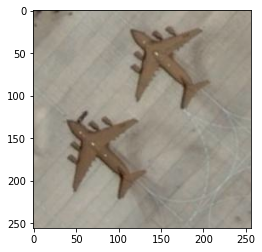

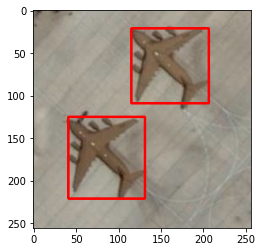

In [ ]:
for e,i in enumerate(os.listdir(annot)):
    if e < 10:
        filename = i.split(".")[0]+".jpg"
        print(filename)
        img = cv2.imread(os.path.join(path,filename))
        df = pd.read_csv(os.path.join(annot,i))
        plt.imshow(img)
        for row in df.iterrows():
            x1 = int(row[1][0].split(" ")[0])
            y1 = int(row[1][0].split(" ")[1])
            x2 = int(row[1][0].split(" ")[2])
            y2 = int(row[1][0].split(" ")[3])
            cv2.rectangle(img,(x1,y1),(x2,y2),(255,0,0), 2)
        plt.figure()
        plt.imshow(img)
        break

<a id=section802></a>
### **9.4 IOU (Intersection Over Union)**

In [ ]:
def get_iou(bb1, bb2):
    assert bb1['x1'] < bb1['x2']
    assert bb1['y1'] < bb1['y2']
    assert bb2['x1'] < bb2['x2']
    assert bb2['y1'] < bb2['y2']

    x_left = max(bb1['x1'], bb2['x1'])
    y_top = max(bb1['y1'], bb2['y1'])
    x_right = min(bb1['x2'], bb2['x2'])
    y_bottom = min(bb1['y2'], bb2['y2'])

    if x_right < x_left or y_bottom < y_top:
        return 0.0

    intersection_area = (x_right - x_left) * (y_bottom - y_top)

    bb1_area = (bb1['x2'] - bb1['x1']) * (bb1['y2'] - bb1['y1'])
    bb2_area = (bb2['x2'] - bb2['x1']) * (bb2['y2'] - bb2['y1'])

    iou = intersection_area / float(bb1_area + bb2_area - intersection_area)
    assert iou >= 0.0
    assert iou <= 1.0
    return iou

- Now we are initialising the **function** to calculate **IOU** (Intersection Over Union) of the **ground** truth box from the box computed by **selective search**.

In [ ]:
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

- In the below code we are performing a **Selective Search** and taking top **2K** region proposals (bounding box candidates).

- Then we calculate the **IOU** (Intersection Over Union) and according to the **IOU** value we append the images to **`train_images`** and labels to **`train_labels`** list.

In [ ]:
train_images=[]
train_labels=[]
for e,i in enumerate(os.listdir(annot)):
    try:
        if i.startswith("airplane"):
            filename = i.split(".")[0]+".jpg"
            print(e,filename)
            image = cv2.imread(os.path.join(path,filename))
            df = pd.read_csv(os.path.join(annot,i))
            gtvalues=[]
            for row in df.iterrows():
                x1 = int(row[1][0].split(" ")[0])
                y1 = int(row[1][0].split(" ")[1])
                x2 = int(row[1][0].split(" ")[2])
                y2 = int(row[1][0].split(" ")[3])
                gtvalues.append({"x1":x1,"x2":x2,"y1":y1,"y2":y2})
            ss.setBaseImage(image)
            ss.switchToSelectiveSearchFast()
            ssresults = ss.process()
            imout = image.copy()
            counter = 0
            falsecounter = 0
            flag = 0
            fflag = 0
            bflag = 0
            for e,result in enumerate(ssresults):
                if e < 2000 and flag == 0:
                    for gtval in gtvalues:
                        x,y,w,h = result
                        iou = get_iou(gtval,{"x1":x,"x2":x+w,"y1":y,"y2":y+h})
                        if counter < 30:
                            if iou > 0.70:
                                timage = imout[y:y+h,x:x+w]
                                resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                                train_images.append(resized)
                                train_labels.append(1)
                                counter += 1
                        else :
                            fflag =1
                        if falsecounter <30:
                            if iou < 0.3:
                                timage = imout[y:y+h,x:x+w]
                                resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                                train_images.append(resized)
                                train_labels.append(0)
                                falsecounter += 1
                        else :
                            bflag = 1
                    if fflag == 1 and bflag == 1:
                        print("inside")
                        flag = 1
    except Exception as e:
        print(e)
        print("error in "+filename)
        continue

0 airplane_150.jpg
1 airplane_060.jpg
2 airplane_066.jpg
3 airplane_114.jpg
4 airplane_177.jpg
5 airplane_146.jpg
6 airplane_183.jpg
7 airplane_117.jpg
8 airplane_058.jpg
9 airplane_164.jpg
10 airplane_157.jpg
11 airplane_143.jpg
12 airplane_002.jpg
13 airplane_009.jpg
14 airplane_145.jpg
15 airplane_006.jpg
16 airplane_139.jpg
17 airplane_025.jpg
18 airplane_107.jpg
19 airplane_125.jpg
20 airplane_091.jpg
21 airplane_130.jpg
22 airplane_188.jpg
23 airplane_200.jpg
24 airplane_172.jpg
25 airplane_105.jpg
26 airplane_048.jpg
27 airplane_075.jpg
inside
28 airplane_030.jpg
29 airplane_078.jpg
30 airplane_043.jpg
31 airplane_142.jpg
32 airplane_052.jpg
33 airplane_161.jpg
34 airplane_190.jpg
inside
35 airplane_042.jpg
36 airplane_176.jpg
37 airplane_044.jpg
38 airplane_166.jpg
39 airplane_121.jpg
inside
40 airplane_041.jpg
inside
41 airplane_061.jpg
42 airplane_087.jpg
43 airplane_136.jpg
inside
44 airplane_079.jpg
45 airplane_004.jpg
inside
46 airplane_020.jpg
47 airplane_073.jpg
48 airpl

- Converting the images and labels to **numpy array**. 

In [ ]:
X_new = np.array(train_images)
y_new = np.array(train_labels)

In [ ]:
X_new.shape

(8910, 224, 224, 3)

<a id=section905></a>
### **9.5 Downloading pre-trained model (VGG16)**

In [ ]:
vggmodel = VGG16(weights='imagenet', include_top=True)
vggmodel.summary()

553467096/553467096 [==============================] - 29s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                           

<a id=section906></a>
### **9.6 Freezing the layers**


- We are **freezing** the first **15 layers** because it is already trained on a similar task and training it again will result in **loss** of the previously learned **features**, and it also requires a lot of **time** and **resources**.

- We are using these layers as **feature extractor**.

In [ ]:
for layers in (vggmodel.layers)[:15]:
  print(layers)
  layers.trainable = False

<a id=section897></a>
### **9.7 Adding Prediction Layer**

- Removing the last **two layers** and adding Dense layer with **`activation="softmax"`** (prediction layer).

In [ ]:
X = vggmodel.layers[-2].output

In [ ]:
predictions = Dense(2, activation="softmax")(X)

- Creating the final model by combining the **feature extractor** layer (pre-trained) and the **prediction layer**.

In [ ]:
model_final = Model(vggmodel.input, predictions)

- We are using **Adam optimizer** with (learninig rate) **`lr=0.0001`**.

In [ ]:
from keras.optimizers import Adam
opt = Adam(lr=0.0001)

/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


- Compiling the model with **proper loss**, **optimizer** and **evaluation metric**.

In [ ]:
model_final.compile(loss = keras.losses.categorical_crossentropy, optimizer = opt, metrics=["accuracy"])

- Below we can see the **structure** of the model.

In [ ]:
model_final.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

**Observations:**
- The top layers of the model are from the **pre-trained** **VGG** model.

- Last layer is the **prediction** layer added by **us**.

<a id=section98></a>
### **9.8 Creating a Class for Custom Encoding**

In [ ]:
class MyLabelBinarizer(LabelBinarizer):
    def transform(self, y):
        Y = super().transform(y)
        if self.y_type_ == 'binary':
            #Stack arrays in sequence horizontally (column wise).
            return np.hstack((Y, 1-Y))  
        else:
            return Y
    def inverse_transform(self, Y, threshold=None):
        if self.y_type_ == 'binary':
            return super().inverse_transform(Y[:, 0], threshold)
        else:
            return super().inverse_transform(Y, threshold)

- Using **`MyLabelBinarizer`** class to encode the label vector **`y_new`**.

In [ ]:
lenc = MyLabelBinarizer()
Y =  lenc.fit_transform(y_new)

<a id=section99></a>
### **9.9 Splitting train and test data**

In [ ]:
X_train, X_test , y_train, y_test = train_test_split(X_new,Y,test_size=0.10)

<a id=section910></a>
### **9.10 Data Agumentation**

- Using **`ImageDataGenerator`** to perform image data agumentation in order  to add more samples.

In [ ]:
trdata = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=90)
traindata = trdata.flow(x=X_train, y=y_train)
tsdata = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=90)
testdata = tsdata.flow(x=X_test, y=y_test)

In [ ]:
from keras.callbacks import  EarlyStopping

- Initializing **`EarlyStopping`** callback

In [ ]:
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=100, verbose=1, mode='auto')

<a id=section911></a>
### **9.11 Training the Model**


- Training model for **`100 epochs`**.

In [ ]:
hist = model_final.fit_generator(generator= traindata, epochs= 100, validation_data= testdata, validation_steps=2, callbacks=[early])

<ipython-input-29-e36edaaa6d4a>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model_final.fit_generator(generator= traindata, epochs= 100, validation_data= testdata, validation_steps=2, callbacks=[early])


Epoch 1/100
251/251 [==============================] - 116s 394ms/step - loss: 0.2548 - accuracy: 0.9151 - val_loss: 0.0914 - val_accuracy: 0.9688
Epoch 2/100
251/251 [==============================] - 96s 383ms/step - loss: 0.1608 - accuracy: 0.9454 - val_loss: 0.1449 - val_accuracy: 0.9688
Epoch 3/100
251/251 [==============================] - 98s 390ms/step - loss: 0.1410 - accuracy: 0.9522 - val_loss: 0.0962 - val_accuracy: 0.9844
Epoch 4/100
251/251 [==============================] - ETA: 0s - loss: 0.1268 - accuracy: 0.9582

<a id=section912></a>
### **9.12 Plotting Training and Validation Loss**

In [ ]:
import matplotlib.pyplot as plt
# plt.plot(hist.history["acc"])
# plt.plot(hist.history['val_acc'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Loss","Validation Loss"])
plt.show()
plt.savefig('chart loss.png')

**Obsservation:**
- We can see a sudden **increase** in validation loss around **epoch 55** but gradually it decreases as the epoch **increases**.

In [ ]:
z = 0

for e, i in enumerate(os.listdir(path)):
    z += 1
    img = cv2.imread(os.path.join(path,i))
    ss.setBaseImage(img)
    ss.switchToSelectiveSearchFast()
    ssresults = ss.process()
    imout = img.copy()
    for e, result in enumerate(ssresults):
        if e < 2000:
            x,y,w,h = result
            timage = imout[y:y+h,x:x+w]
            resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
            img = np.expand_dims(resized, axis=0)
            out= model_final.predict(img)
            if out[0][0] > 0.70:
                cv2.rectangle(imout, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
    plt.figure()
    plt.imshow(imout)
    break

**Observation:**

-  There are bounding boxes having **confidence > 70%** bounding the aeroplane in the image.

<br> 

- R-CNN uses **selective search** algorithm to extract the **top 2000 region** proposals among millions of **regions of interest** (ROI) proposals from an image and feed it to a **CNN** model.

<br>   
<center><img src="https://raw.githubusercontent.com/insaid2018/DeepLearning/master/images/odj1.png" width='850' height="450"></center>

<a id=section802></a>
### **9.13 R-CNN Procedure**


<br>   
<center><img src="https://raw.githubusercontent.com/insaid2018/DeepLearning/master/images/odj2.png" width='850' height="400"></center>

- R-CNN uses the **selective Search** Algorithm to find the **Regions of Interest** which is a **slow** and time **consuming** process.

  - The above process shown, is for only one image. 

  - Now, if in the dataset we have **3000** training images, the entire **process** will run **3000** times. 

  - So, we can imagine how much **longer time** it takes to **train** the model. 

- Therefore, the number of **CNNs** used here is equal to the number of **ROI** proposals per **image**.

  - Consequently, the total number of features for **CNN**, for **3000** images will become **3000 x 2000 = 6,000,000**.

---
<a name = Section10></a>
# **10. Conclusion**
---

- R-CNN is now **depricated** and is not used in real-time due to **slower** response time, but they are the building blocks of object detection **algorithm**.

- Due to **advancement** in the domain of object **detection** the **R-CNN** varient has become obsolete.

- We use more **advanced** techniques such as **Mask R-CNN**, **YOLO** (You Only Look Once), **Spatial Pyramid Pooling** (SPP-net), **Single Shot Detector** (SSD), and **RetinaNet** etc.

- We will go through **YOLO** and **SSD** in-depth in our upcoming **module**.